# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import numpy as np
import pandas as pd
zillow_data = pd.read_csv('zillow_data.csv')
zillow_data.head(15)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [ ]:
##df['average_1_3'] = df[['salary_1', 'salary_3']].mean(axis=1)
##df

In [2]:
zillow_data.groupby(['State']).mean()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
State,,,,,,,,,,,,,,,,,,,,,
AK,111822.214286,99616.785714,6321.035714,128382.142857,128832.142857,129253.571429,129639.285714,130028.571429,130367.857143,130710.714286,...,317921.428571,318610.714286,319382.142857,320185.714286,321378.571429,322657.142857,323775.000000,324167.857143,323692.857143,323046.428571
AL,73606.803279,35779.169399,7580.245902,86795.569620,87122.151899,87460.759494,87798.734177,88156.962025,88531.012658,88918.987342,...,149255.191257,149675.956284,150125.136612,150537.704918,150969.945355,151629.508197,152402.732240,153625.683060,155504.371585,157033.879781
AR,92528.914286,72470.733333,7381.476190,68868.041237,69015.463918,69140.206186,69262.886598,69378.350515,69507.216495,69674.226804,...,131952.380952,132379.047619,132778.095238,132973.333333,133020.000000,133188.571429,133522.857143,134456.190476,136192.380952,137620.000000
AZ,127652.643478,85506.465217,5017.873913,116202.790698,116562.790698,116934.883721,117315.348837,117719.534884,118150.232558,118626.511628,...,257896.086957,259598.260870,261243.043478,262884.347826,264369.130435,265908.260870,267327.826087,268714.782609,270488.695652,271952.173913
CA,99003.562092,93308.559641,5070.638889,200220.959596,200124.831650,200035.942761,199965.572391,199958.754209,200037.626263,200277.020202,...,692367.156863,697869.607843,704045.669935,710515.114379,716760.866013,723263.480392,729496.405229,735525.980392,742146.323529,746329.084967
CO,102056.895582,80584.979920,6636.775100,142561.943320,142765.991903,142985.425101,143204.453441,143461.943320,143752.631579,144106.882591,...,384512.449799,386958.634538,389367.469880,391558.634538,393813.253012,396777.510040,399905.220884,403134.939759,407292.369478,410528.915663
CT,60286.596774,6405.903226,7825.217742,157189.516129,157063.709677,156926.612903,156778.225806,156640.322581,156525.806452,156462.903226,...,277025.806452,278666.129032,280383.870968,281137.096774,281725.000000,282175.806452,282852.419355,283826.612903,284893.548387,285431.451613
DC,66137.444444,20014.500000,2675.000000,189216.666667,188611.111111,188011.111111,187438.888889,186900.000000,186494.444444,186222.222222,...,779644.444444,782905.555556,785277.777778,786261.111111,788122.222222,790450.000000,793622.222222,798838.888889,804600.000000,806166.666667
DE,66079.000000,19866.536585,6431.829268,125784.615385,126234.615385,126665.384615,127026.923077,127346.153846,127603.846154,127838.461538,...,261448.780488,262785.365854,263839.024390,265412.195122,269814.634146,274487.804878,277912.195122,279470.731707,276529.268293,271897.560976


In [3]:
## creating a dataframe where only the columns for the state and for the relevant months are present
grouped_dataframe = zillow_data.groupby(['State']).mean()
grouped_dataframe.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
State,,,,,,,,,,,,,,,,,,,,,
AK,111822.214286,99616.785714,6321.035714,128382.142857,128832.142857,129253.571429,129639.285714,130028.571429,130367.857143,130710.714286,...,317921.428571,318610.714286,319382.142857,320185.714286,321378.571429,322657.142857,323775.000000,324167.857143,323692.857143,323046.428571
AL,73606.803279,35779.169399,7580.245902,86795.569620,87122.151899,87460.759494,87798.734177,88156.962025,88531.012658,88918.987342,...,149255.191257,149675.956284,150125.136612,150537.704918,150969.945355,151629.508197,152402.732240,153625.683060,155504.371585,157033.879781
AR,92528.914286,72470.733333,7381.476190,68868.041237,69015.463918,69140.206186,69262.886598,69378.350515,69507.216495,69674.226804,...,131952.380952,132379.047619,132778.095238,132973.333333,133020.000000,133188.571429,133522.857143,134456.190476,136192.380952,137620.000000
AZ,127652.643478,85506.465217,5017.873913,116202.790698,116562.790698,116934.883721,117315.348837,117719.534884,118150.232558,118626.511628,...,257896.086957,259598.260870,261243.043478,262884.347826,264369.130435,265908.260870,267327.826087,268714.782609,270488.695652,271952.173913
CA,99003.562092,93308.559641,5070.638889,200220.959596,200124.831650,200035.942761,199965.572391,199958.754209,200037.626263,200277.020202,...,692367.156863,697869.607843,704045.669935,710515.114379,716760.866013,723263.480392,729496.405229,735525.980392,742146.323529,746329.084967


In [4]:
#select columns State, 2013-04, and 2018-04
relevant_columns = grouped_dataframe[['2013-04', '2018-04']]
relevant_columns.head()

,2013-04,2018-04
State,,
AK,293810.714286,323046.428571
AL,133532.571429,157033.879781
AR,113128.846154,137620.000000
AZ,198057.017544,271952.173913
CA,479805.206612,746329.084967


In [5]:
## Select the top 3 states from the existing dataframe
states = grouped_dataframe.loc[ ['VT' , 'CT', 'AK'] , : ]
states.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
State,,,,,,,,,,,,,,,,,,,,,
VT,59940.625000,5585.687500,11146.312500,82825.000000,82556.250000,82306.250000,82037.500000,81781.250000,81568.750000,81418.750000,...,212768.750000,214225.000000,215968.750000,217168.750000,217306.250000,216318.750000,214750.000000,213581.250000,213250.000000,213150.000000
CT,60286.596774,6405.903226,7825.217742,157189.516129,157063.709677,156926.612903,156778.225806,156640.322581,156525.806452,156462.903226,...,277025.806452,278666.129032,280383.870968,281137.096774,281725.000000,282175.806452,282852.419355,283826.612903,284893.548387,285431.451613
AK,111822.214286,99616.785714,6321.035714,128382.142857,128832.142857,129253.571429,129639.285714,130028.571429,130367.857143,130710.714286,...,317921.428571,318610.714286,319382.142857,320185.714286,321378.571429,322657.142857,323775.000000,324167.857143,323692.857143,323046.428571


In [ ]:
# Select the top 3 zipcodes for each state
# State VT, state CT, state AK
# A list of all the zipcodes 
# A list of all the zipcodes for state VT


In [6]:
zillow_data.head(15) 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [7]:
# Creating a dataframe for VT
zillow_data_vt = zillow_data[zillow_data['State'] == 'VT']
zillow_data_vt.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6146,59945,5641,Barre,VT,Barre,Washington,6147,86600.0,86100.0,85700.0,...,168700,170100,172100,173200,172700,171400,169500,167900,166900,166200
6188,59920,5478,Saint Albans,VT,Burlington,Franklin,6189,102800.0,102300.0,101900.0,...,208700,209600,209200,208200,207400,207200,207900,208900,210300,211500
7185,59938,5602,Montpelier,VT,Barre,Washington,7186,98500.0,98200.0,97800.0,...,247400,249200,251900,254000,254700,253100,249400,246400,244900,243500
9222,59928,5488,Swanton,VT,Burlington,Franklin,9223,104200.0,103700.0,103200.0,...,193500,193600,192800,192200,192200,192600,193000,193700,194500,195300
10300,59973,5676,Waterbury,VT,Barre,Washington,10301,85100.0,84900.0,84800.0,...,253700,255700,259000,261900,262900,261300,258100,255400,253200,251300


In [ ]:
##zillow_data_vt.State.nunique()

In [ ]:
#select columns State, 2013-04, and 2018-04
##relevant_vt = zillow_data_vt[['2013-04', '2018-04']]
##relevant_vt.head()

In [ ]:
# Selecting the top 3 zip codes from VT
# create a column where 2018-04 is divided by 2013-04 
#relevant_vt['gain'] = (relevant_vt['2018-04'] - relevant_vt['2013-04']) / relevant_vt['2013-04']
#relevant_vt.sort_values('gain', ascending=False).head(3)

In [ ]:
##zillow_data_vt.loc[6014]

In [8]:
zillow_data_vt['gain'] = (zillow_data_vt['2018-04'] - zillow_data_vt['2013-04']) / zillow_data_vt['2013-04']
zillow_data_vt.sort_values('gain', ascending=False).head(3)

/Users/alextyryshkin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,gain
10991,59898,5454,Fairfax,VT,Burlington,Franklin,10992,132900.0,132000.0,131200.0,...,256900,256500,256100,256400,257200,258100,259300,260600,261800,0.125537
10687,59894,5450,Enosburg Falls,VT,Burlington,Franklin,10688,37500.0,37400.0,37400.0,...,166000,165500,165400,165700,166200,167000,167300,167200,167300,0.114590
9222,59928,5488,Swanton,VT,Burlington,Franklin,9223,104200.0,103700.0,103200.0,...,193600,192800,192200,192200,192600,193000,193700,194500,195300,0.113455


In [9]:
# Creating a dataframe for CT
zillow_data_ct = zillow_data[zillow_data['State'] == 'CT']
zillow_data_ct.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
112,60081,6010,Bristol,CT,Hartford,Hartford,113,120300.0,120000.0,119800.0,...,188900,190000,191200,191800,192900,193600,194100,194900,195700,195700
416,60368,6516,West Haven,CT,New Haven,New Haven,417,96500.0,96300.0,96100.0,...,176600,176600,177300,177800,178200,178700,179700,180200,179700,178700
545,60363,6511,New Haven,CT,New Haven,New Haven,546,89800.0,90000.0,90200.0,...,181400,184000,187700,190100,193100,196300,198400,199100,199100,198300
684,60454,6810,Danbury,CT,Stamford,Fairfield,685,151100.0,150700.0,150200.0,...,252200,254800,258500,260900,262500,264000,265300,266100,266500,266500
898,60347,6492,Wallingford,CT,New Haven,New Haven,899,146800.0,146600.0,146300.0,...,247600,248700,250200,251700,253100,254500,256100,257600,257600,256400


In [10]:
# Selecting the top 3 zip codes from CT
# create a column where 2018-04 is divided by 2013-04 
zillow_data_ct['gain'] = (zillow_data_ct['2018-04'] - zillow_data_ct['2013-04']) / zillow_data_ct['2013-04']
zillow_data_ct.sort_values('gain', ascending=False).head(3)

/Users/alextyryshkin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,gain
13563,60115,6058,Norfolk,CT,Torrington,Litchfield,13564,158400.0,159500.0,160500.0,...,280100,282900,280400,280900,286500,292100,298900,307700,314600,0.257788
4716,60393,6610,Bridgeport,CT,Stamford,Fairfield,4717,79700.0,79700.0,79700.0,...,154000,156300,157200,158600,160400,162200,163900,165900,167300,0.230126
1331,60390,6606,Bridgeport,CT,Stamford,Fairfield,1332,87700.0,87700.0,87600.0,...,176700,178500,180000,181300,182600,183700,184300,184500,184300,0.229517


In [11]:
# Creating a dataframe for AK
zillow_data_ak = zillow_data[zillow_data['State'] == 'AK']
zillow_data_ak.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1654,100223,99504,Anchorage,AK,Anchorage,Anchorage,1655,123000.0,124200.0,125300.0,...,320400,321400,322900,324100,325400,327200,329200,329100,326100,323000
2184,100226,99507,Anchorage,AK,Anchorage,Anchorage,2185,130500.0,131100.0,131900.0,...,364500,364600,364600,364100,364700,365200,365400,365100,363600,361800
2872,100227,99508,Anchorage,AK,Anchorage,Anchorage,2873,117900.0,118200.0,118500.0,...,310000,311300,311800,312800,314900,317100,319900,321100,318400,314600
3833,100334,99654,Tanaina,AK,Anchorage,Matanuska Susitna,3834,122700.0,124200.0,125700.0,...,254500,256100,258100,258700,258600,258800,259400,259900,260200,260500
4106,100459,99801,Juneau,AK,Juneau,Juneau,4107,166800.0,166200.0,165400.0,...,398600,397800,398200,398800,399800,402300,406200,409800,412600,413300


In [12]:
zillow_data_ak['gain'] = (zillow_data_ak['2018-04'] - zillow_data_ak['2013-04']) / zillow_data_ak['2013-04']
zillow_data_ak.sort_values('gain', ascending=False).head(3)


/Users/alextyryshkin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,gain
7497,100301,99615,Kodiak,AK,NaN,Kodiak Island,7498,131300.0,132400.0,133600.0,...,336500,338300,339300,342000,346100,350100,352200,353400,354700,0.262278
8658,100473,99835,Sitka,AK,NaN,Sitka,8659,155500.0,154900.0,154200.0,...,381800,383600,386600,391300,396200,397500,398900,402100,404800,0.207637
7293,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway,7294,117100.0,117200.0,117300.0,...,286100,285800,286300,288800,291900,294200,297500,302100,305100,0.185775


In [ ]:
# The top 5 zipcodes
pull out row (df.iloc)
convert to a dataframe (name of df should include zipcode) pd.dataframe
set date as index pd.set 
use step 4
pull out data from last year as test part 
follow lab for modeling
get the predictions for the last year, calculate RMSE, do forecasting as shown in the lab, combine all of this code into one function


In [ ]:
## Repeat the lines below for two more zipcodes

In [13]:
## returning a highest gain zipcode for ak
df_ak_99615 = zillow_data_ak[zillow_data_ak['RegionName'] == 99615]
df_ak_99615

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,gain
7497,100301,99615,Kodiak,AK,NaN,Kodiak Island,7498,131300.0,132400.0,133600.0,...,336500,338300,339300,342000,346100,350100,352200,353400,354700,0.262278


In [14]:
df_ak_99615_rn = df_ak_99615.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'gain'], inplace=False, axis=1)
df_ak_99615_rn 

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7497,99615,131300.0,132400.0,133600.0,134800.0,136000.0,137200.0,138500.0,139900.0,141400.0,...,334500,336500,338300,339300,342000,346100,350100,352200,353400,354700


In [ ]:
#df_ak_99615_rn_dt = get_datetimes(df_ak_99615_rn)

In [ ]:
#df_ak_99615_rn_dt.head()

In [32]:
df_ak_99615_rn_melt = melt_data(df_ak_99615_rn)
df_ak_99615_rn_melt_dt = df_ak_99615_rn_melt.set_index('time')
df_ak_99615_rn_melt_dt

KeyError: "None of ['time'] are in the columns"

In [ ]:
##Test Set and drop from original dataframe
##df3 = df_ak_99615_rn_melt['2017-04':]
##df3


In [33]:
## AK top zipcode in the right format
df_ak_99615_rn_melt = df_ak_99615_rn_melt[:-12]
df_ak_99615_rn_melt

,value
time,
1996-04-01,131300.0
1996-05-01,132400.0
1996-06-01,133600.0
1996-07-01,134800.0
1996-08-01,136000.0
...,...
2016-12-01,327200.0
2017-01-01,328300.0
2017-02-01,329300.0


In [ ]:
## Modeling for AK top zipcode

In [19]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

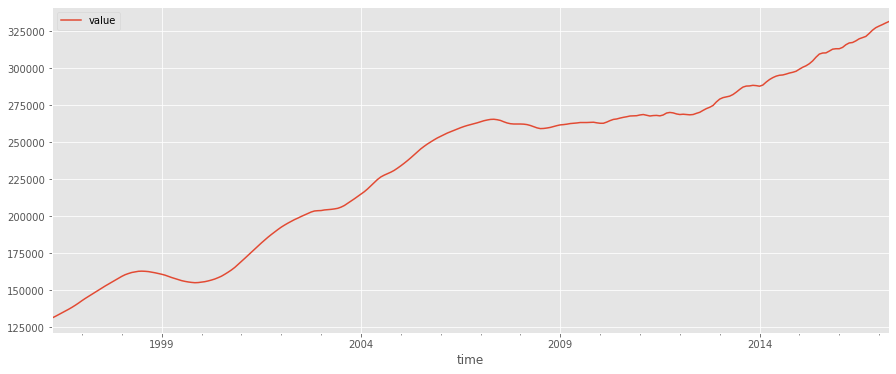

               value
time                
1996-04-01  131300.0
1996-05-01  132400.0
1996-06-01  133600.0
1996-07-01  134800.0
1996-08-01  136000.0


In [34]:
df_ak_99615_rn_melt.plot(figsize=(15, 6))
plt.show()
print(df_ak_99615_rn_melt.head())

In [35]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [36]:
## returning a highest gain zipcode for CT 6058
df_ct_6058 = zillow_data_ct[zillow_data_ct['RegionName'] == 6058]
df_ct_6058

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,gain
13563,60115,6058,Norfolk,CT,Torrington,Litchfield,13564,158400.0,159500.0,160500.0,...,280100,282900,280400,280900,286500,292100,298900,307700,314600,0.257788


In [37]:
df_ct_6058_rn = df_ct_6058.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'gain'], inplace=False, axis=1)
df_ct_6058_rn 

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
13563,6058,158400.0,159500.0,160500.0,161400.0,162300.0,163200.0,164200.0,164900.0,165700.0,...,271200,280100,282900,280400,280900,286500,292100,298900,307700,314600


In [38]:
df_ct_6058_rn_melt = melt_data(df_ct_6058_rn)
df_ct_6058_rn_melt_dt = df_ct_6058_rn_melt.set_index('time')
df_ct_6058_rn_melt_dt

KeyError: "None of ['time'] are in the columns"

In [39]:
## CT top zipcode in the right format
df_ct_6058_rn_melt = df_ct_6058_rn_melt[:-12]
df_ct_6058_rn_melt

,value
time,
1996-04-01,158400.0
1996-05-01,159500.0
1996-06-01,160500.0
1996-07-01,161400.0
1996-08-01,162300.0
...,...
2016-12-01,277700.0
2017-01-01,277600.0
2017-02-01,276800.0


In [40]:
## returning a highest gain zipcode for VT 6058
df_vt_5454 = zillow_data_vt[zillow_data_vt['RegionName'] == 5454]
df_vt_5454

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,gain
10991,59898,5454,Fairfax,VT,Burlington,Franklin,10992,132900.0,132000.0,131200.0,...,256900,256500,256100,256400,257200,258100,259300,260600,261800,0.125537


In [41]:
df_vt_5454_rn = df_vt_5454.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'gain'], inplace=False, axis=1)
df_vt_5454_rn 

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
10991,5454,132900.0,132000.0,131200.0,130300.0,129300.0,128500.0,127700.0,126900.0,126300.0,...,255800,256900,256500,256100,256400,257200,258100,259300,260600,261800


In [42]:
df_vt_5454_rn_melt = melt_data(df_vt_5454_rn)
df_vt_5454_rn_melt_dt = df_vt_5454_rn_melt.set_index('time')
df_vt_5454_rn_melt_dt

KeyError: "None of ['time'] are in the columns"

In [43]:
## VT top zipcode in the right format
df_vt_5454_rn_melt = df_vt_5454_rn_melt[:-12]
df_vt_5454_rn_melt

,value
time,
1996-04-01,132900.0
1996-05-01,132000.0
1996-06-01,131200.0
1996-07-01,130300.0
1996-08-01,129300.0
...,...
2016-12-01,251200.0
2017-01-01,252300.0
2017-02-01,253800.0


In [44]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

# Step 2: Data Preprocessing

In [30]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [31]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

In [ ]:
## AK, VT, CT


In [ ]:
df_ak_99615_rn_melt
df_ct_6058_rn_melt
df_vt_5454_rn_melt

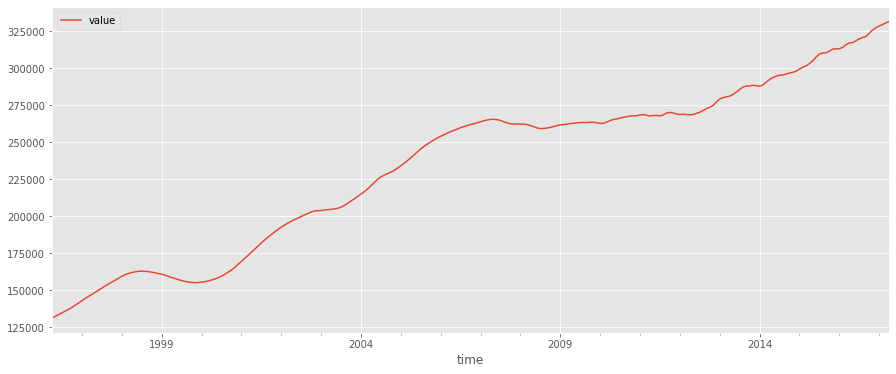

               value
time                
1996-04-01  131300.0
1996-05-01  132400.0
1996-06-01  133600.0
1996-07-01  134800.0
1996-08-01  136000.0


In [45]:
## Modeling for one zipcode in AK
df_ak_99615_rn_melt.plot(figsize=(15, 6))
plt.show()
print(df_ak_99615_rn_melt.head())

In [46]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [47]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_ak_99615_rn_melt,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6964.329039678465
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =244055.33180382085
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5197.300408103773
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4928.542187591326
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5045.124780159844
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4985.2150821000205
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4777.558315077191
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4758.995190120557
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6755.284921071527
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =251213.02907256808
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5025.3801171750565
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5102.651575012476
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6839.643837546288
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6711.896630974322
ARIMA (0, 0, 1) 

In [48]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           3319.22
Name: 63, dtype: object

In [49]:
## Fitting an ARIMA time series model
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df_ak_99615_rn_melt, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.(summary).tables[1])

SyntaxError: invalid syntax (<ipython-input-49-28fa505bd926>, line 12)

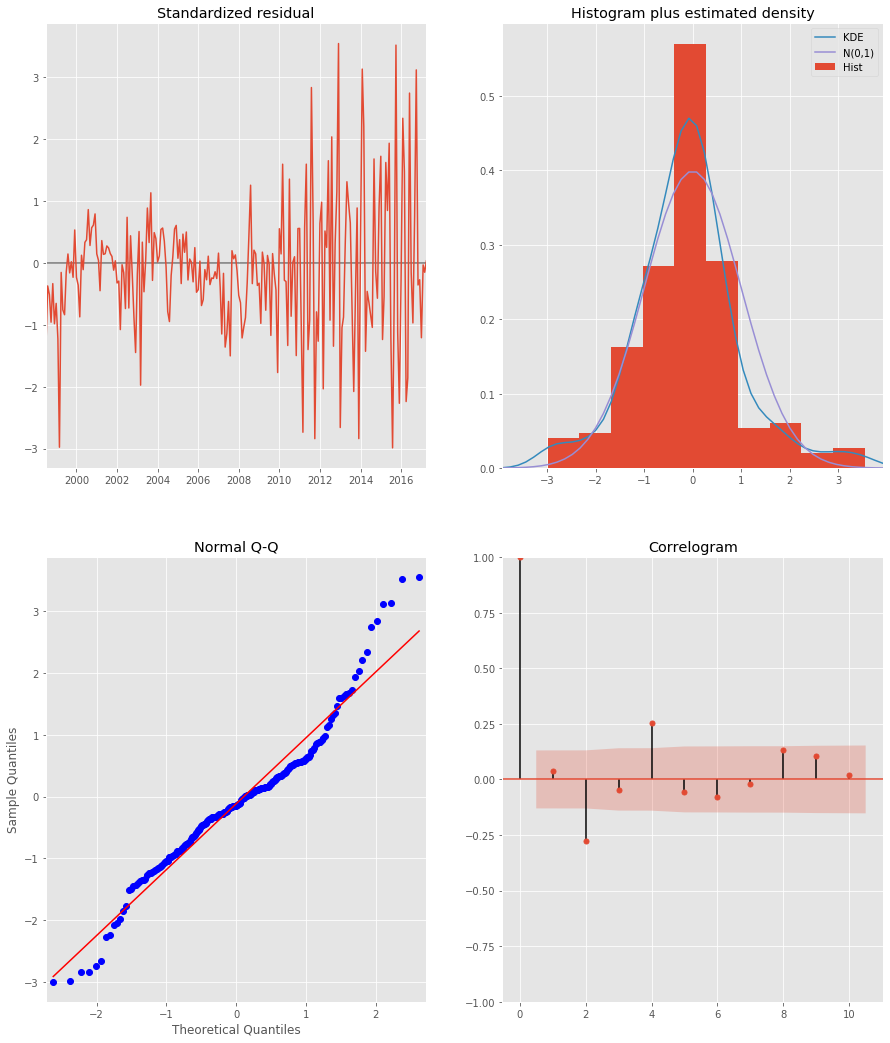

In [50]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [51]:
# Get predictions starting from 2013-04-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2013-04-01'), dynamic=False)
pred_conf = pred.conf_int()

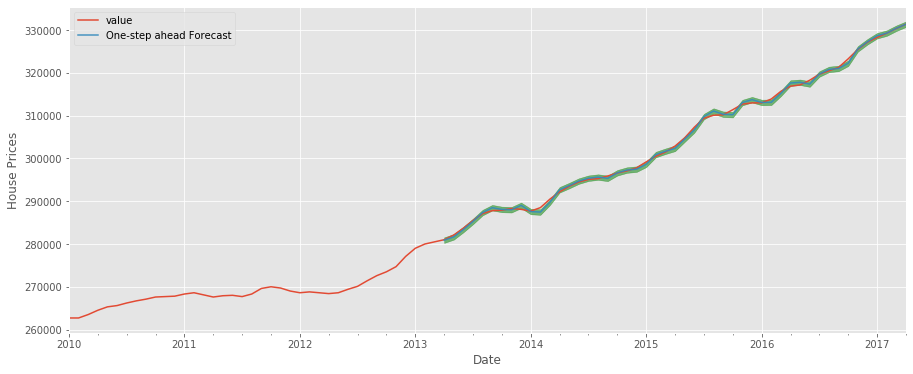

In [52]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df_ak_99615_rn_melt['2010':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
plt.legend()

plt.show()

In [53]:
# Get the real and predicted values
house_prices_forecasted = pred.predicted_mean[0]
house_prices_truth = df_ak_99615_rn_melt['2013-04-01':]['value']

# Compute the mean square error
mse = ((house_prices_forecasted - house_prices_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 782273500.04


In [54]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2013-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

AttributeError: 'numpy.float64' object has no attribute 'index'

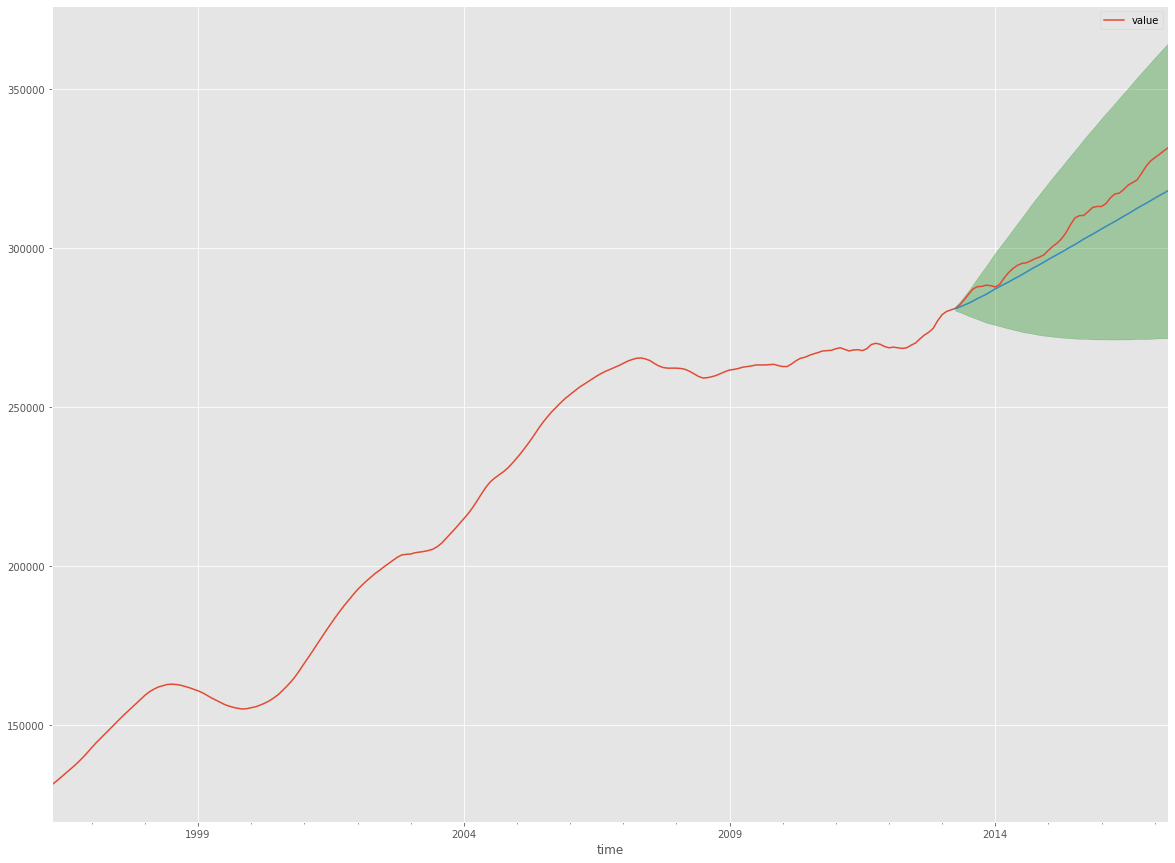

In [55]:
ax = df_ak_99615_rn_melt['1996':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2013-04-01'), house_prices_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices Levels')

plt.legend()
plt.show()

In [56]:
# Extract the predicted and true values of our time series
house_prices_forecasted = pred_dynamic.predicted_mean
house_prices_truth = df_ak_99615_rn_melt['2013-04-01':]
house_prices_forecasted_mod = pd.DataFrame(house_prices_forecasted)
house_prices_forecasted_mod_two = house_prices_forecasted_mod[0]
house_prices_truth_mod = house_prices_truth['value']
# Compute the mean square error
mse = ((house_prices_forecasted_mod_two - house_prices_truth_mod) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 48088161.07


In [57]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

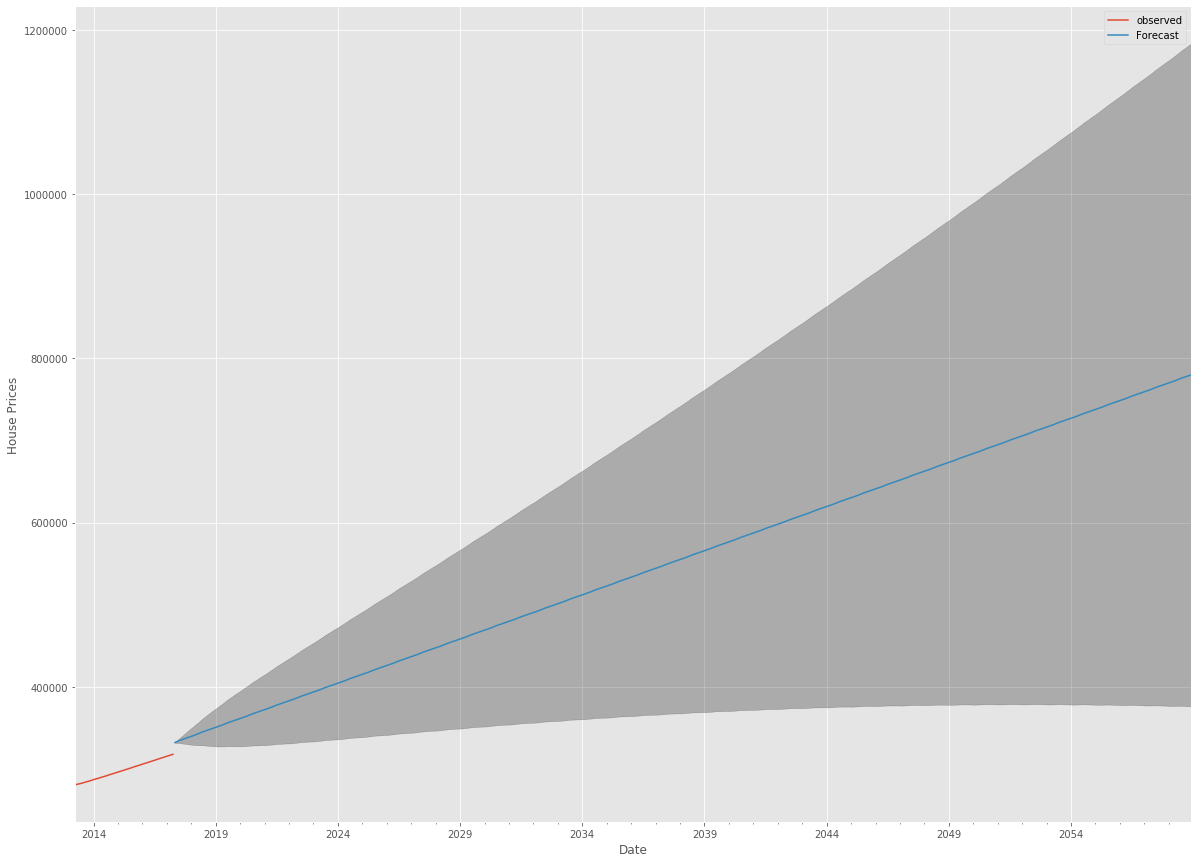

In [58]:
# Plot future predictions with confidence intervals
ax = house_prices_forecasted.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

In [ ]:
## Combining the modeling steps into one function


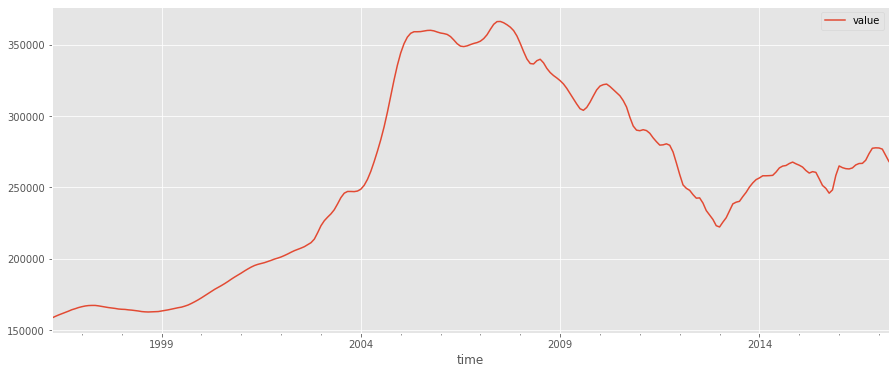

               value
time                
1996-04-01  158400.0
1996-05-01  159500.0
1996-06-01  160500.0
1996-07-01  161400.0
1996-08-01  162300.0


In [59]:
## Modeling for one zipcode in CT df_ct_6058_rn_melt
df_ct_6058_rn_melt.plot(figsize=(15, 6))
plt.show()
print(df_ct_6058_rn_melt.head())

In [60]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    

In [61]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_ct_6058_rn_melt,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =7010.058061546939
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6528.433094981931
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5597.5983682342
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5330.848064865166
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5618.956295093523
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5587.466495066334
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5318.035061201907
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =6791.909467264806
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6800.801088859738
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6435.181885953558
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5601.562647193872
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =7529.078449314193
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6898.350758549546
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6768.137141213872
ARIMA (0, 0, 1) x (1, 

In [62]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4029.18
Name: 63, dtype: object

In [64]:
## Fitting an ARIMA time series model
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df_ct_6058_rn_melt, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.(summary).tables[1])

SyntaxError: invalid syntax (<ipython-input-64-a3924d407ddd>, line 12)

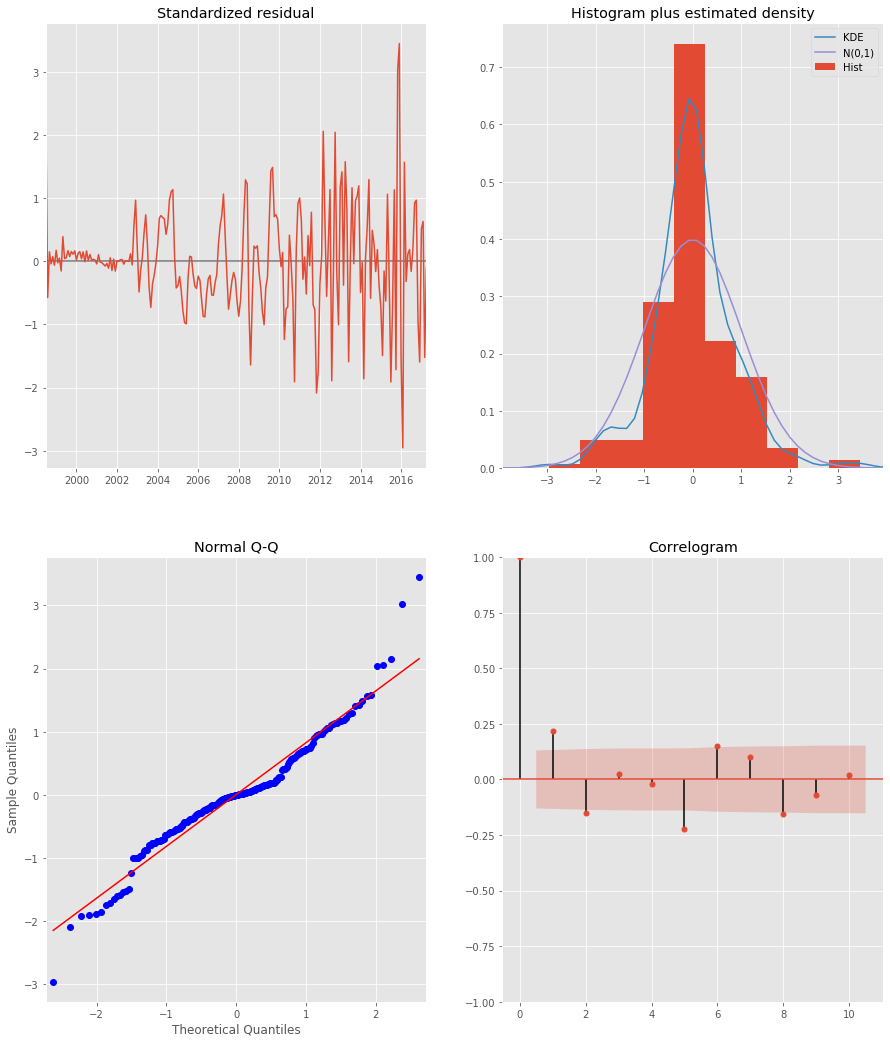

In [65]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [66]:
# Get predictions starting from 2013-04-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2013-04-01'), dynamic=False)
pred_conf = pred.conf_int()

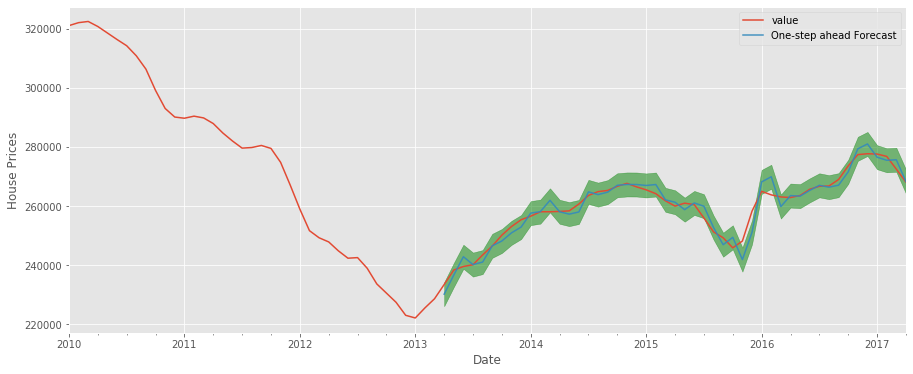

In [67]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df_ct_6058_rn_melt['2010':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
plt.legend()

plt.show()

In [68]:
# Get the real and predicted values
house_prices_forecasted = pred.predicted_mean[0]
house_prices_truth = df_ct_6058_rn_melt['2013-04-01':]['value']

# Compute the mean square error
mse = ((house_prices_forecasted - house_prices_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 991512069.07


In [69]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2013-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

AttributeError: 'numpy.float64' object has no attribute 'index'

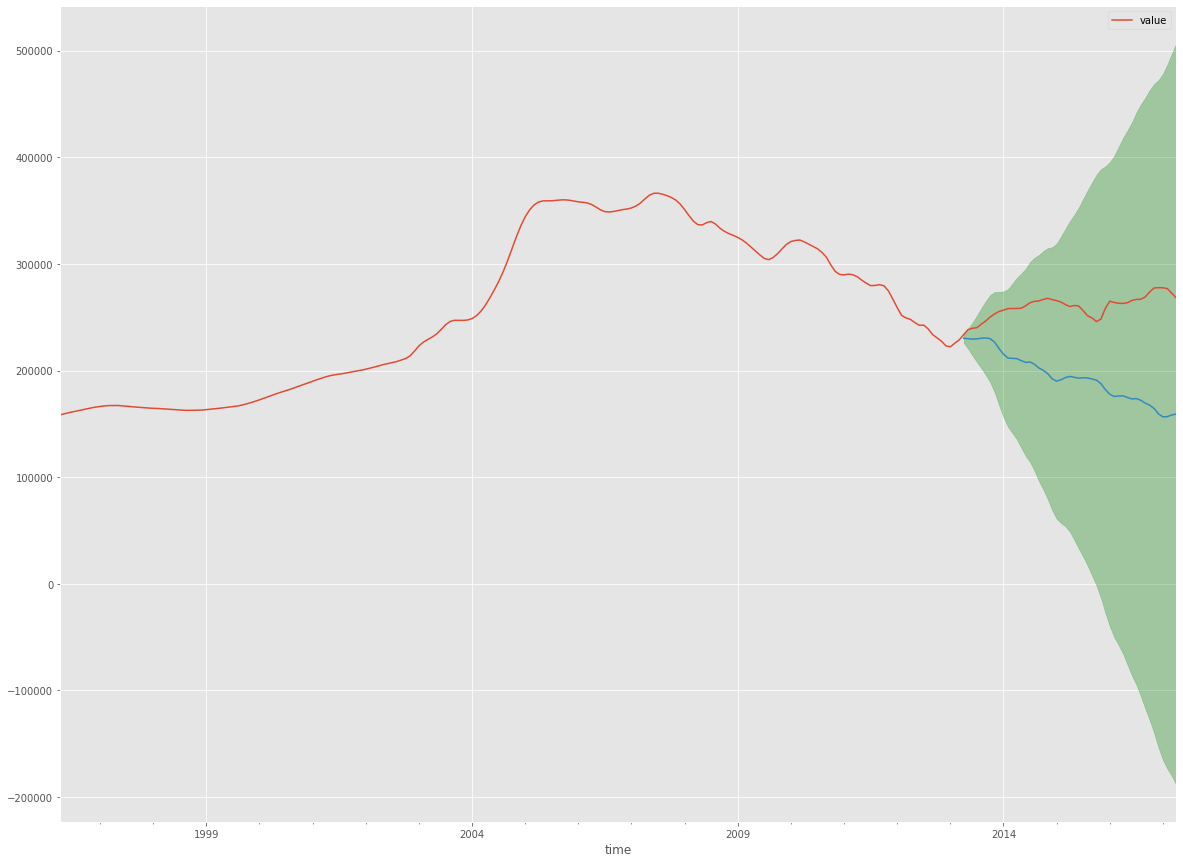

In [70]:
ax = df_ct_6058_rn_melt['1996':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2013-04-01'), house_prices_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices Levels')

plt.legend()
plt.show()

In [71]:
# Extract the predicted and true values of our time series
house_prices_forecasted = pred_dynamic.predicted_mean
house_prices_truth = df_ct_6058_rn_melt['2013-04-01':]
house_prices_forecasted_mod = pd.DataFrame(house_prices_forecasted)
house_prices_forecasted_mod_two = house_prices_forecasted_mod[0]
house_prices_truth_mod = house_prices_truth['value']
# Compute the mean square error
mse = ((house_prices_forecasted_mod_two - house_prices_truth_mod) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5320735377.96


In [72]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

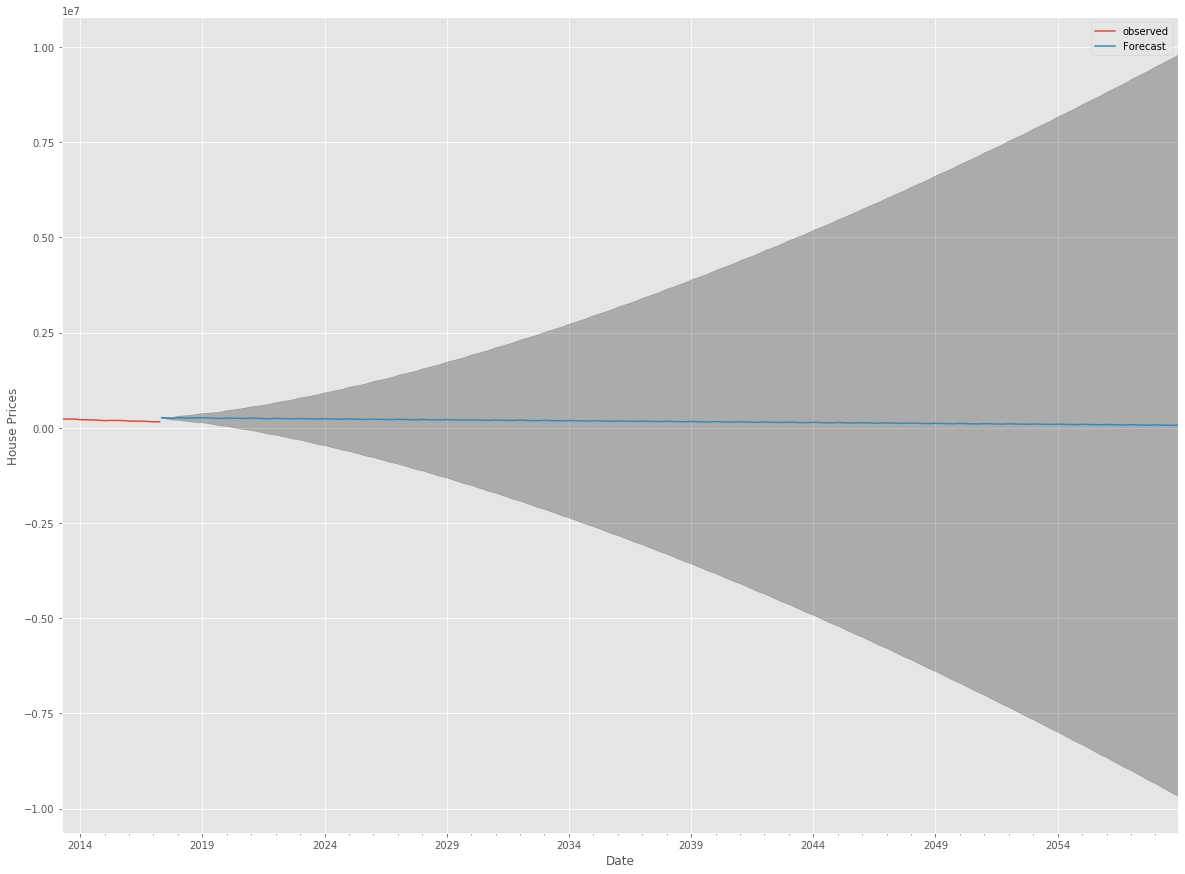

In [73]:
# Plot future predictions with confidence intervals
ax = house_prices_forecasted.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

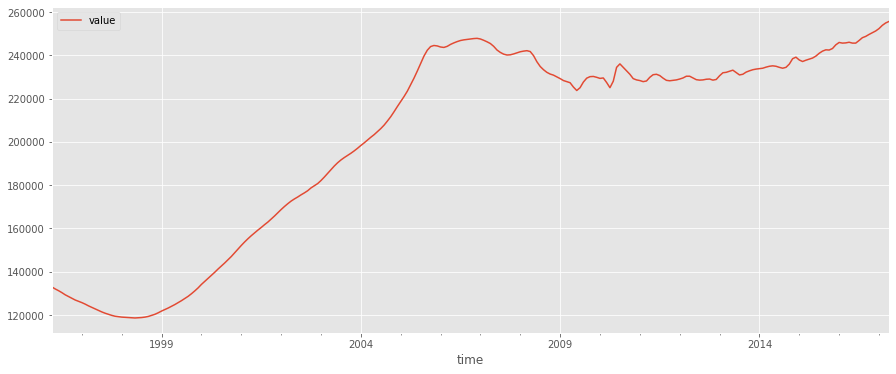

               value
time                
1996-04-01  132900.0
1996-05-01  132000.0
1996-06-01  131200.0
1996-07-01  130300.0
1996-08-01  129300.0


In [74]:
## Modeling for one zipcode in VT df_vt_5454_rn_melt
df_vt_5454_rn_melt.plot(figsize=(15, 6))
plt.show()
print(df_vt_5454_rn_melt.head())

In [75]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    

In [76]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_vt_5454_rn_melt,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6886.760466530248
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6412.171408927046
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5179.159911171394
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4928.0814634934595
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5146.880083122749
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5127.016828123845
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4764.4621858788905
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =6154.530204397065
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6678.181283834887
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6318.293332468567
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5011.161877999283
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =7776.950474000576
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6351.287661524611
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6300.534610108169
ARIMA (0, 0, 1) x 

In [77]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           3648.75
Name: 63, dtype: object

In [78]:
## Fitting an ARIMA time series model
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df_vt_5454_rn_melt, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.(summary).tables[1])

SyntaxError: invalid syntax (<ipython-input-78-c42b04b49c64>, line 12)

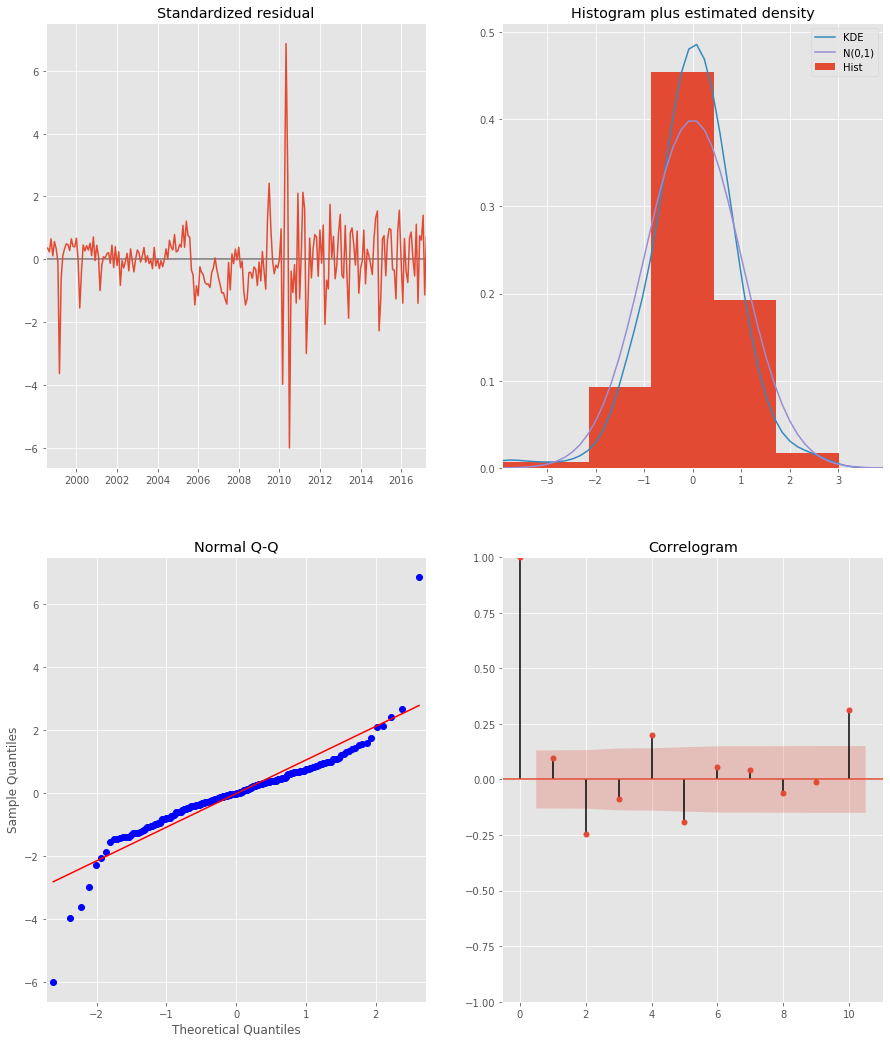

In [79]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [80]:
# Get predictions starting from 2013-04-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2013-04-01'), dynamic=False)
pred_conf = pred.conf_int()

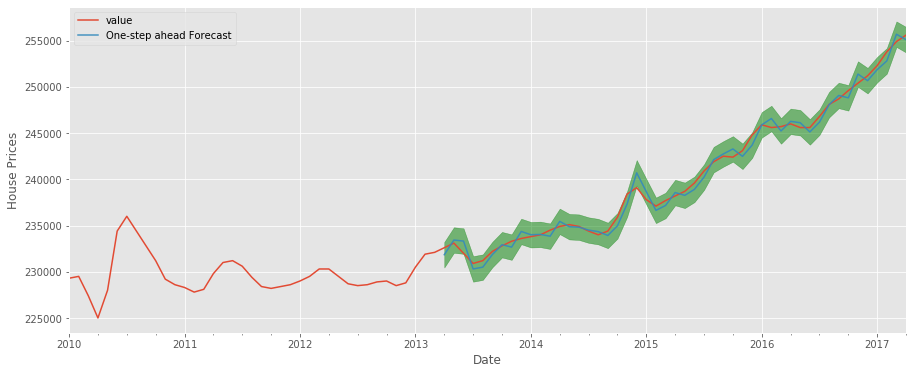

In [81]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df_vt_5454_rn_melt['2010':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
plt.legend()

plt.show()

In [82]:
# Get the real and predicted values
house_prices_forecasted = pred.predicted_mean[0]
house_prices_truth = df_vt_5454_rn_melt['2013-04-01':]['value']

# Compute the mean square error
mse = ((house_prices_forecasted - house_prices_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 124376411.43


In [83]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2013-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

AttributeError: 'numpy.float64' object has no attribute 'index'

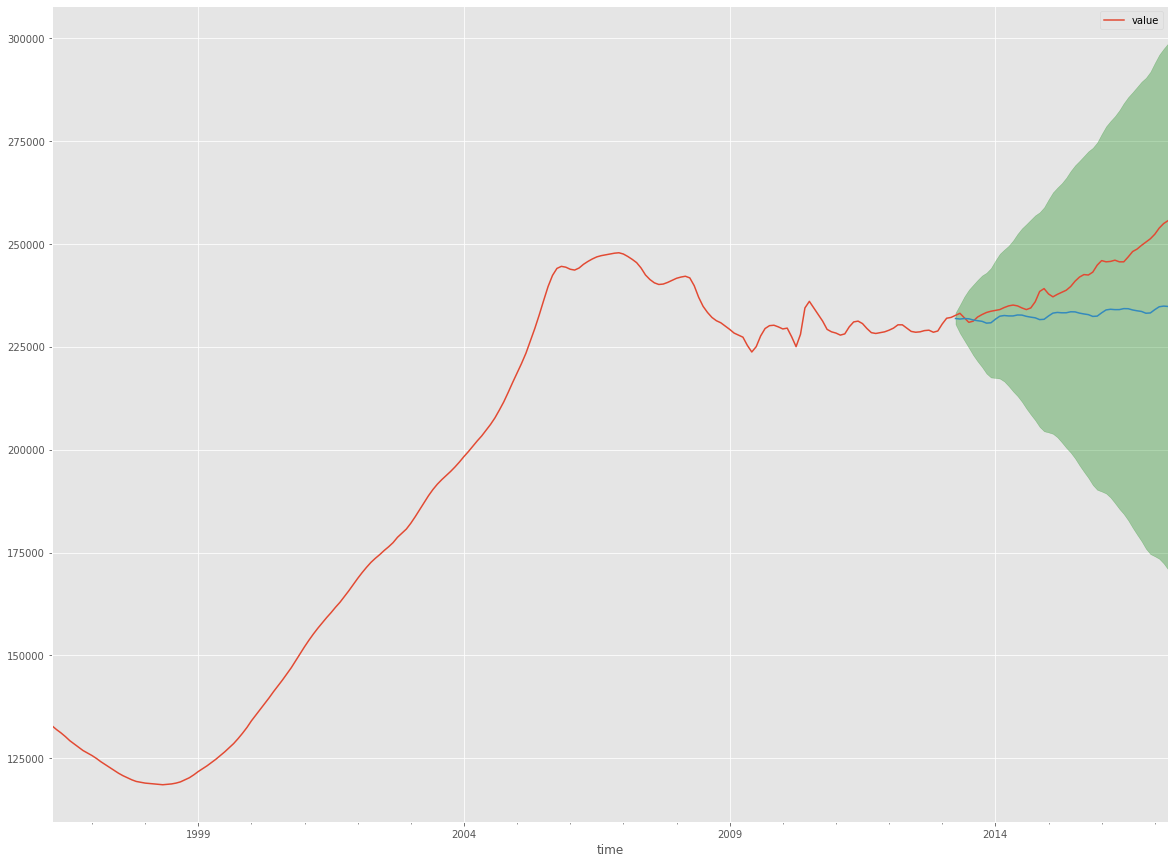

In [84]:
ax = df_vt_5454_rn_melt['1996':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2013-04-01'), house_prices_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices Levels')

plt.legend()
plt.show()

In [85]:
# Extract the predicted and true values of our time series
house_prices_forecasted = pred_dynamic.predicted_mean
house_prices_truth = df_vt_5454_rn_melt['2013-04-01':]
house_prices_forecasted_mod = pd.DataFrame(house_prices_forecasted)
house_prices_forecasted_mod_two = house_prices_forecasted_mod[0]
house_prices_truth_mod = house_prices_truth['value']
# Compute the mean square error
mse = ((house_prices_forecasted_mod_two - house_prices_truth_mod) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 97195784.75


In [86]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

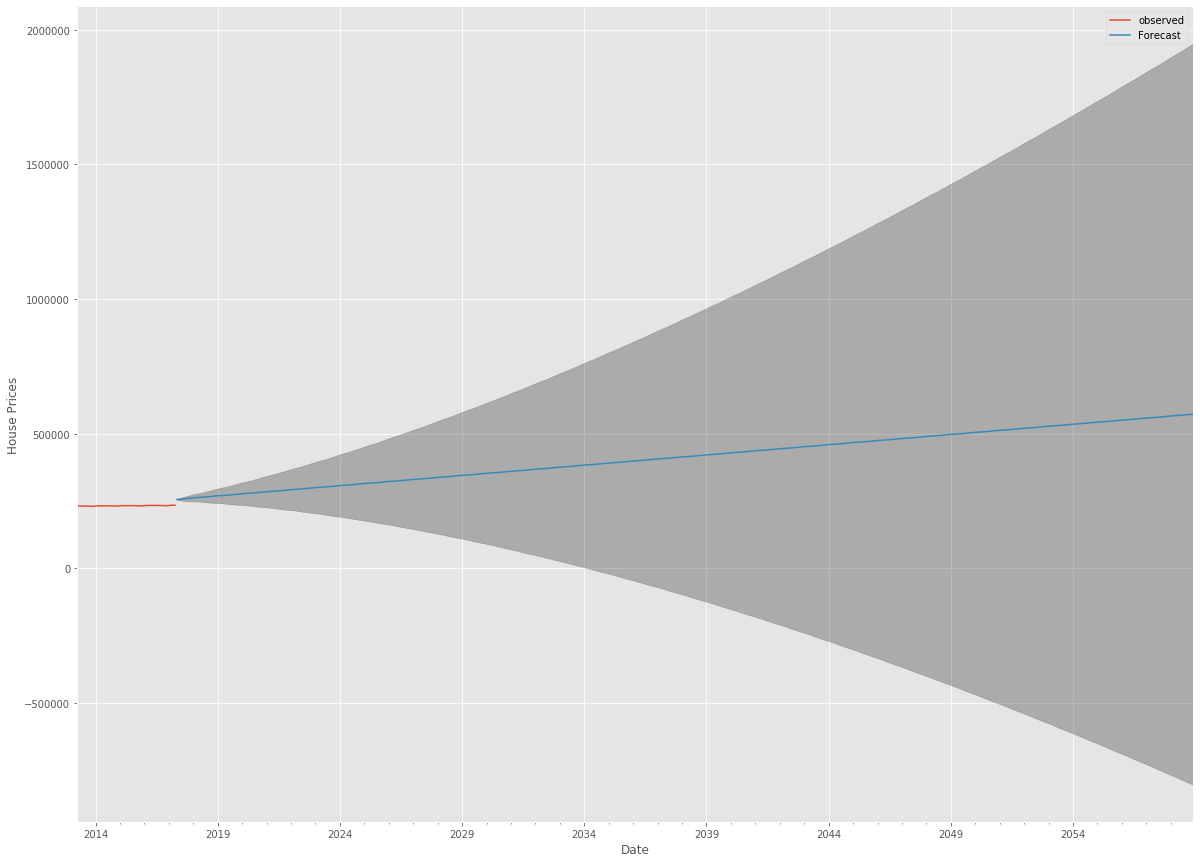

In [87]:
# Plot future predictions with confidence intervals
ax = house_prices_forecasted.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

# Step 6: Interpreting Results